In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import random
import re
import matplotlib.pyplot as plt

In [2]:
df = []
dhf = []
dss = []

f = open("../../../../Data/Proteins/DENV1/DF.txt", "r")
for x in f:
    if x[0] != ">" and x[0] != "\n":
        df.append(x)

f = open("../../../../Data/Proteins/DENV1/DHF3.txt", "r")
for x in f:
    if x[0] != ">" and x[0] != "\n":
        dhf.append(x)

f = open("../../../../Data/Proteins/DENV1/DSS.txt", "r")
for x in f:
    if x[0] != ">" and x[0] != "\n":
        dss.append(x)
     
print("The number of DF samples are", len(df))
print("The number of DHF samples are", len(dhf))
print("The number of DSS samples are", len(dss))

The number of DF samples are 896
The number of DHF samples are 718
The number of DSS samples are 42


In [3]:
df = pd.DataFrame(df)
dhf = pd.DataFrame(dhf)
dss = pd.DataFrame(dss)

# Making the disease label column
df_disease = np.repeat(0, 896)
dss_disease = np.repeat(1, 42)
dhf_disease = np.repeat(1, 718)

# Attaching the "Disease" label column to the input
df["Disease"] = df_disease
dss["Disease"] = dss_disease
dhf["Disease"] = dhf_disease

# Renaming the columns
df = df.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})
dss = dss.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})
dhf = dhf.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})

In [4]:
# Concatinating the input data into one DataFrame
result = pd.concat([df, dss, dhf], axis = 0, sort = False)
print("The combined shape of the given data is:", str(result.shape))

# Taking a peek at the combined data
result = result.sample(frac = 1)
print(result.head())

The combined shape of the given data is: (1656, 2)
                                              Sequence  Disease
39   MNNQRKKTARPSFNMLKRARNRVSTVSQLAKRFSKGLLSGQGPMKL...        0
435  MNNQRKKTARPSFNMLKRARNRVSTVSQLAKRFSKGLLSGQGPMKL...        1
348  MNNQRKKTARPSFNMLKRARNRVSTVSQLAKRFSKGLLSGQGPMKL...        0
17   MNNQRKKTARPSFNMLKRARNRVSTVSQLAKRFSKGLLSGQGPMKL...        1
696  TANISLTAIANQAAILMGLDKGWPISKMDIGVPLLALGCYSQVNPL...        0


In [5]:
# Function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

result['words'] = result.apply(lambda x: getKmers(x['Sequence']), axis=1)
result = result.drop('Sequence', axis=1)

result_texts = list(result['words'])
for item in range(len(result_texts)):
    result_texts[item] = ' '.join(result_texts[item])

The shape of y is: (1656,)


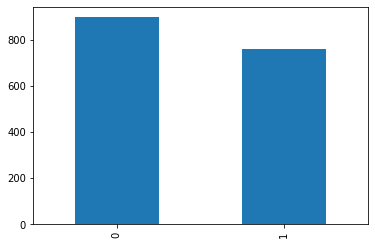

In [6]:
# Creating y and printing the shape of it
y = result.iloc[:, 0].values
print("The shape of y is:", y.shape)

# Checking the balance of the disease severity
result["Disease"].value_counts().sort_index().plot.bar()

In [7]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
x = cv.fit_transform(result_texts)

# Print the shape of x
print("The shape of x matrix is:", x.shape)

The shape of x matrix is: (1656, 15748)


## Nested Cross-Validation

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
# search for an optimal value of C for Logistic Regression
C_list = [0.1, 1, 10, 100]
# empty list to store scores
C_scores = []

In [9]:
# 1. we will loop through reasonable values of C
for c in C_list:
    # 2. run SVM with C = c
    svm = SVC(C = c, random_state = 0, kernel = "linear")
    # 3. obtain cross_val_score for SVM with C = c
    scores = cross_val_score(svm, x, y, cv = 10, scoring = "accuracy")
    # 4. append mean of scores for C = c to C_scores list
    C_scores.append(scores.mean())
    
    print("The score for C =", c, "is:", scores.mean())

The score for C = 0.1 is: 0.7735377875136911
The score for C = 1 is: 0.7801715954728003
The score for C = 10 is: 0.7795655348667396
The score for C = 100 is: 0.7795655348667396


In [10]:
# search for an optimal value of C for Logistic Regression
C_list2 = [0.7, 1.3]
# empty list to store scores
C_scores2 = []

In [11]:
# 1. we will loop through reasonable values of C
for c in C_list2:
    # 2. run SVM with C = c
    svm = SVC(C = c, random_state = 0, kernel = "linear")
    # 3. obtain cross_val_score for SVM with C = c
    scores = cross_val_score(svm, x, y, cv = 10, scoring = "accuracy")
    # 4. append mean of scores for C = c to C_scores list
    C_scores2.append(scores.mean())
    
    print("The score for C =", c, "is:", scores.mean())

The score for C = 0.7 is: 0.7771522453450164
The score for C = 1.3 is: 0.7801715954728003


In [12]:
# search for an optimal value of C for Logistic Regression
C_list3 = [1.1, 1.2]
# empty list to store scores
C_scores3 = []

In [13]:
# 1. we will loop through reasonable values of C
for c in C_list3:
    # 2. run SVM with C = c
    svm = SVC(C = c, random_state = 0, kernel = "linear")
    # 3. obtain cross_val_score for SVM with C = c
    scores = cross_val_score(svm, x, y, cv = 10, scoring = "accuracy")
    # 4. append mean of scores for C = c to C_scores list
    C_scores3.append(scores.mean())
    
    print("The score for C =", c, "is:", scores.mean())

The score for C = 1.1 is: 0.7789667761956919
The score for C = 1.2 is: 0.7789667761956919


In [14]:
# search for an optimal value of C for Logistic Regression
C_list4 = [0.8, 0.9]
# empty list to store scores
C_scores4 = []

In [15]:
# 1. we will loop through reasonable values of C
for c in C_list4:
    # 2. run SVM with C = c
    svm = SVC(C = c, random_state = 0, kernel = "linear")
    # 3. obtain cross_val_score for SVM with C = c
    scores = cross_val_score(svm, x, y, cv = 10, scoring = "accuracy")
    # 4. append mean of scores for C = c to C_scores list
    C_scores4.append(scores.mean())
    
    print("The score for C =", c, "is:", scores.mean())

The score for C = 0.8 is: 0.7789594742606791
The score for C = 0.9 is: 0.7801715954728003


In [17]:
# search for an optimal value of C for Logistic Regression
C_list5 = [1.5, 1.7]
# empty list to store scores
C_scores5 = []

In [18]:
# 1. we will loop through reasonable values of C
for c in C_list5:
    # 2. run SVM with C = c
    svm = SVC(C = c, random_state = 0, kernel = "linear")
    # 3. obtain cross_val_score for SVM with C = c
    scores = cross_val_score(svm, x, y, cv = 10, scoring = "accuracy")
    # 4. append mean of scores for C = c to C_scores list
    C_scores5.append(scores.mean())
    
    print("The score for C =", c, "is:", scores.mean())

The score for C = 1.5 is: 0.7813837166849215
The score for C = 1.7 is: 0.7813837166849215


In [19]:
# search for an optimal value of C for Logistic Regression
C_list6 = [1.9, 2.1]
# empty list to store scores
C_scores6 = []

In [20]:
# 1. we will loop through reasonable values of C
for c in C_list6:
    # 2. run SVM with C = c
    svm = SVC(C = c, random_state = 0, kernel = "linear")
    # 3. obtain cross_val_score for SVM with C = c
    scores = cross_val_score(svm, x, y, cv = 10, scoring = "accuracy")
    # 4. append mean of scores for C = c to C_scores list
    C_scores6.append(scores.mean())
    
    print("The score for C =", c, "is:", scores.mean())

The score for C = 1.9 is: 0.7801715954728003
The score for C = 2.1 is: 0.7795655348667396
